# Novexus - Churn Rate

## Objetivo

Você é a pessoa contratada como cientista de dados pela operadora de telecomunicações Novexus. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de **reduzir a Taxa de Evasão de Clientes**, também conhecida como **Churn Rate**.

## Lendo os arquivos

In [97]:
# Importando as bibliotecas

import pandas as pd
import json

In [98]:
# Carregando os dados

with open('Telco-Customer-Churn.json', 'r') as file:
    dados = json.load(file)

# Normalizando os dados

df_normalizado = pd.json_normalize(dados)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Criando o dicionário do DataFrame

In [99]:
# Verificando o nome das colunas

df_normalizado.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [100]:
# Traduzindo o nome das colunas

df_normalizado.columns = ['clienteID', 'churn', 'genero', 'cliente_idoso',
       'parceiro', 'dependente', 'meses_contrato',
       'servico_telefonico', 'multiplas_linhas', 'servico_internet',
       'seguranca_online', 'backup_online',
       'protecao_dispositivo', 'suporte_tecnico',
       'streaming_tv', 'streaming_filmes', 'tipo_contrato',
       'fatura_online', 'forma_pagamento',
       'servicos_mes', 'gasto_total']

df_normalizado.head()

,clienteID,churn,genero,cliente_idoso,parceiro,dependente,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,servicos_mes,gasto_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `genero`: gênero (masculino e feminino) 
* `cliente_idoso`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `parceiro`:  se o cliente possui ou não um parceiro ou parceira
* `dependente`: se o cliente possui ou não dependentes
* `meses_contrato`:  meses de contrato do cliente
* `servico_telefonico`: assinatura de serviço telefônico 
* `multiplas_linhas`: assisnatura de mais de uma linha de telefone 
* `servico_internet`: assinatura de um provedor internet 
* `seguranca_online`: assinatura adicional de segurança online 
* `backup_online`: assinatura adicional de backup online 
* `protecao_dispositivo`: assinatura adicional de proteção no dispositivo 
* `suporte_tecnico`: assinatura adicional de suporte técnico, menos tempo de espera
* `streaming_tv`: assinatura de TV a cabo 
* `streaming_filmes`: assinatura de streaming de filmes 
* `tipo_contrato`: tipo de contrato
* `fatura_online`: se o cliente prefere receber online a fatura
* `forma_pagamento`: forma de pagamento
* `servicos_mes`: total de todos os serviços do cliente por mês
* `gasto_total`: total gasto pelo cliente

## Verificando os tipos de dados das colunas

In [101]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clienteID             7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   cliente_idoso         7267 non-null   int64  
 4   parceiro              7267 non-null   object 
 5   dependente            7267 non-null   object 
 6   meses_contrato        7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes     

Ao tentar transformar a coluna `gasto_total` em um tipo `float`, ela indica que existem valores que não podem ser transformados.

Vamos dar uma olhada nesses valores:

In [102]:
# Verificando os valores ' ' existentes

df_normalizado[df_normalizado['gasto_total'] == ' ']

,clienteID,churn,genero,cliente_idoso,parceiro,dependente,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,servicos_mes,gasto_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


O motivo do erro se dá pois os clientes em questão ainda não completaram 1 mês de contrato, logo o valor gasto é **0**. 

Vamos substituir os valores dessas colunas

In [103]:
# Guardando os indices em uma variável

indices = df_normalizado[df_normalizado['gasto_total'] == ' '].index

# Escrevendo a função

df_normalizado.loc[indices, 'gasto_total'] = df_normalizado.iloc[indices].apply(lambda x: x['meses_contrato'] * x['servicos_mes'], axis= 1)

# Verificando a alteração

df_normalizado.iloc[indices]

,clienteID,churn,genero,cliente_idoso,parceiro,dependente,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,servicos_mes,gasto_total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,0.0
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0


In [104]:
# Transformando os valores tipo 'object' em 'float' 

df_normalizado['gasto_total'] = df_normalizado['gasto_total'].astype(float)

# Verificando novamente os dados

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clienteID             7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   cliente_idoso         7267 non-null   int64  
 4   parceiro              7267 non-null   object 
 5   dependente            7267 non-null   object 
 6   meses_contrato        7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  streaming_tv          7267 non-null   object 
 15  streaming_filmes     

In [105]:
# Verificando os valores únicos das colunas do tipo 'object'

for coluna in df_normalizado.select_dtypes('object').columns:
    print(f'Nome da coluna: {coluna}')
    print(f'Valores unicos: {df_normalizado[coluna].unique()}')
    print('-' *30)

Nome da coluna: clienteID
Valores unicos: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Nome da coluna: churn
Valores unicos: ['No' 'Yes' '']
------------------------------
Nome da coluna: genero
Valores unicos: ['Female' 'Male']
------------------------------
Nome da coluna: parceiro
Valores unicos: ['Yes' 'No']
------------------------------
Nome da coluna: dependente
Valores unicos: ['Yes' 'No']
------------------------------
Nome da coluna: servico_telefonico
Valores unicos: ['Yes' 'No']
------------------------------
Nome da coluna: multiplas_linhas
Valores unicos: ['No' 'Yes' 'No phone service']
------------------------------
Nome da coluna: servico_internet
Valores unicos: ['DSL' 'Fiber optic' 'No']
------------------------------
Nome da coluna: seguranca_online
Valores unicos: ['No' 'Yes' 'No internet service']
------------------------------
Nome da coluna: backup_online
Valores unicos: ['Yes' 'No' 'No intern

Observamos que na coluna `churn` há valores em faltando.

Vamos dar uma olhada nesses valores inconsistentes:

In [106]:
df_normalizado[df_normalizado['churn'] == '']

,clienteID,churn,genero,cliente_idoso,parceiro,dependente,meses_contrato,servico_telefonico,multiplas_linhas,servico_internet,...,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,servicos_mes,gasto_total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


Como são poucos, irei retira-los do meu DataFrame

In [107]:
# Guardando os indices em uma variável

dropar = df_normalizado[df_normalizado['churn'] == ''].index

# Retirando os dados inconsistentes

df_normalizado.drop(dropar, axis= 0, inplace=True)

## Gráficos de distribuição de Churn

Antes de fazer os gráficos, vamos fazer uma pré analise da Taxa de Evasão (Churn Rate)

In [108]:
# Porcentagem total de churn

churn_yes = df_normalizado.query('churn == "Yes"')
churn_no = df_normalizado.query('churn == "No"')

porcentagem_churn = churn_yes.shape[0]/(churn_yes.shape[0] + churn_no.shape[0]) * 100

print(f'O Churn Rate atual da novexus é de {round(porcentagem_churn, 2)}%')

O Churn Rate atual da novexus é de 26.54%


Nosso objetivo é abaixar essa taxa de 26,54% de churn rate

Vamos verificar, por meio de gráficos, onde esses dados mais se relacionam

In [109]:
import plotly.express as px

fig = px.histogram(df_normalizado, x= 'genero', color= 'churn', 
                   title= 'Distribuição de Churn por Gênero',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Gênero',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

# Alterando a label da legenda (trace)
fig.update_traces(selector=dict(name='y'), name='Churned')

fig.show()

In [110]:
fig = px.histogram(df_normalizado, x= 'servico_telefonico', color= 'churn', 
                   title= 'Distribuição de Churn por Serviço de Telefonia',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Serviço de telefonia',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

# Alterando a label da legenda (trace)
fig.update_traces(selector=dict(name='1'), name='Churned')

fig.show()

In [111]:
fig = px.histogram(df_normalizado, x= 'servico_internet', color= 'churn', 
                   title= 'Distribuição de Churn por Serviço de Internet',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Serviço de internet',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

# Alterando a label da legenda (trace)
fig.update_traces(selector=dict(name='1'), name='Churned')

fig.show()

In [112]:
fig = px.histogram(df_normalizado, x= 'seguranca_online', color= 'churn', 
                   title= 'Distribuição de Churn por serviço de Segurança Online',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Segurança Online',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

In [113]:
fig = px.histogram(df_normalizado, x= 'protecao_dispositivo', color= 'churn', 
                   title= 'Distribuição de Churn por serviço adicional de Proteção de dispositivo',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Proteção de dispositivo',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

In [114]:
fig = px.histogram(df_normalizado, x= 'suporte_tecnico', color= 'churn', 
                   title= 'Distribuição de Churn por assinatura de Suporte Tecnico',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Suporte Tecnico',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

In [115]:
fig = px.histogram(df_normalizado, x= 'tipo_contrato', color= 'churn', 
                   title= 'Distribuição de Churn por tipo de Contrato',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Tipo de contrato',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

In [116]:
fig = px.histogram(df_normalizado, x= 'forma_pagamento', color= 'churn', 
                   title= 'Distribuição de Churn por Forma de Pagamento',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Forma de Pagamento',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

In [117]:
fig = px.histogram(df_normalizado, x= 'cliente_idoso', color= 'churn', 
                   title= 'Distribuição de Churn por em cliente com 65 ou mais',
                   labels={'churn': 'Churn Status'})

fig.update_layout(xaxis_title= 'Idoso',
                  yaxis_title= 'Contagem',
                  title_font= {'size': 20},
                  title_y= 0.85)

fig.show()

Com os graficos acima podemos observar:

- Alta taxa de churn em usuários de **fibra ótica**

- Alta taxa de churn em usuários **sem** serviço de segurança online
 
- Alta taxa de churn em usuários **sem** serviço adicional de proteção de dispositivo
 
- Média a taxa de churn em usuários **com** serviço adicional de proteção de dispositivo
 
- Alta taxa de churn em usuários **sem** serviço adicional de suporte tecnico
 
- Alta taxa de churn em usuários com contrato do tipo **month-to-month**
 
- Alta taxa de churn em usuários com forma de pagamento do tipo *electronic check*
 
- Alta taxa de churn em usuários **idosos**

### Boxplot das variáveis numéricas

In [118]:
fig = px.box(df_normalizado, x= 'churn', y= 'meses_contrato', title= 'Distribuição dos meses de contrato')
fig.show()

fig = px.box(df_normalizado, x= 'churn', y= 'servicos_mes', title= 'Distribuição do custo total de todos os serviços do cliente por mês')
fig.show()

fig = px.box(df_normalizado, x= 'churn', y= 'gasto_total', title= 'Distribuição do gasto total')
fig.show()

Os clientes que permaneceram na empresa tiveram, em média, contratos mais longos do que os que cancelaram.

Entretanto, os clientes com gastos mensais maiores tem uma taxa maior de cancelamento, o que pode indicar uma insatisfação com os diferentes tipos de serviço ou com a empresa.

Os clientes com gastos totais menores tiveram uma taxa de evasão maior, isso se deve ao tempo de contrato maior.

### Tabela de correlação

Com os graficos feitos, vamos obter mais uma visualização para compreender quais as variaveis que estão mais relacionadas com os churns da empresa.

Para isso criaremos uma tabela de correlação junto com o heatmap para visualizar e entender melhor essas relações

In [119]:
mapa = {
        'churn': {'No': 0, 'Yes': 1},
        'parceiro': {'No': 0, 'Yes': 1},
        'dependente': {'No': 0, 'Yes': 1},
        'servico_telefonico': {'No': 0, 'Yes': 1},
        'fatura_online': {'No': 0, 'Yes': 1},
        'genero': {'Female': 0, 'Male': 1}
}

df_normalizado.replace(mapa, inplace= True)

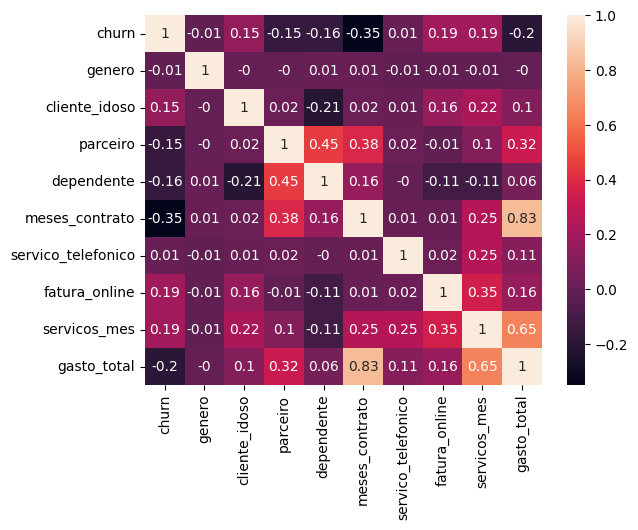

In [120]:
import seaborn as sns

sns.heatmap(df_normalizado.corr(numeric_only= True).round(2), annot= True);

Analisando, vemos que o `genero` e `servico_telefonico` tem pouca influencia na taxa de churn da Novexus.

Por outro lado, os `meses_contrato`, `fatura_online` e `servicos_mes` apresentam um bom relacionamento com a variável churn

O `gasto_total` é bastante relacionada com as colunas `meses_contrato` e `servicos_mes`, logo, também influência sua alta taxa de relacionamento

## Transformando em variáveis categóricas binárias

Com o código executado anteriormente, transformamos variáveis categóricas de 2 valores em binárias.

Agora, precisamos transformar as outras variáveis com 3 ou mais valores.

In [121]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clienteID             7043 non-null   object 
 1   churn                 7043 non-null   int64  
 2   genero                7043 non-null   int64  
 3   cliente_idoso         7043 non-null   int64  
 4   parceiro              7043 non-null   int64  
 5   dependente            7043 non-null   int64  
 6   meses_contrato        7043 non-null   int64  
 7   servico_telefonico    7043 non-null   int64  
 8   multiplas_linhas      7043 non-null   object 
 9   servico_internet      7043 non-null   object 
 10  seguranca_online      7043 non-null   object 
 11  backup_online         7043 non-null   object 
 12  protecao_dispositivo  7043 non-null   object 
 13  suporte_tecnico       7043 non-null   object 
 14  streaming_tv          7043 non-null   object 
 15  streaming_filmes      7043

In [122]:
df = df_normalizado.copy()
df = df.drop('clienteID', axis= 1)

In [123]:
# Importando o OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

In [124]:
# Fazendo uma lista das variáveis categoricas

categ_cols = list(df.select_dtypes('object').columns)

In [125]:
# Transformando as variaveis categoricas com o One Hot Encoder

OH_encoder = OneHotEncoder(sparse_output= False)

df_ohe = pd.DataFrame(OH_encoder.fit_transform(df[categ_cols]))

df_ohe.index = df.index

df_ohe = df_ohe.astype(int)

df_num = df.drop(categ_cols, axis= 1)

df_ohe = pd.concat([df_num, df_ohe], axis= 1)

df_ohe.columns = df_ohe.columns.astype(str)

df_ohe.head()

,churn,genero,cliente_idoso,parceiro,dependente,meses_contrato,servico_telefonico,fatura_online,servicos_mes,gasto_total,...,21,22,23,24,25,26,27,28,29,30
0,0,0,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [126]:
# Removendo as colunas com pouca relevancia para a variavel alvo

df_ohe.drop(['genero', 'servico_telefonico'], axis= 1, inplace= True)

In [127]:
# Separando as features e a variavel alvo

X = df_ohe.drop('churn', axis= 1)
y = df_ohe['churn']

In [128]:
# Separando os dados de treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [129]:
# Balanceando os dados de treino

from imblearn.over_sampling import SMOTE

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)

In [130]:
print('Antes do SMOTE')
print(y_train.value_counts())
print('\n')
print('Depois do SMOTE')
print(y_train_resampled.value_counts())

Antes do SMOTE
churn
0    3616
1    1314
Name: count, dtype: int64


Depois do SMOTE
churn
0    3616
1    3616
Name: count, dtype: int64


In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def metricas(y_test, predict):
    
    print('Accuracy score:')
    print(round(accuracy_score(y_test, predict) * 100, 2), '%')
    print('\n')
    print('Precision score:')
    print(round(precision_score(y_test, predict) * 100, 2), '%')
    print('\n')
    print('Recall score:')
    print(round(recall_score(y_test, predict) * 100, 2), '%')
    print('\n')
    print('F1 score:')
    print(round(f1_score(y_test, predict) * 100, 2), '%')

## Testando os modelos

In [132]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier(random_state=8)
RFC_model.fit(X_train_resampled, y_train_resampled)
RFC_predict = RFC_model.predict(X_test)

metricas(y_test, RFC_predict)

Accuracy score:
78.42 %


Precision score:
59.5 %


Recall score:
55.86 %


F1 score:
57.62 %


In [133]:
from sklearn.ensemble import BaggingClassifier

BC_model = BaggingClassifier(random_state= 8)
BC_model.fit(X_train_resampled, y_train_resampled)
BC_predict = BC_model.predict(X_test)

metricas(y_test, BC_predict)

Accuracy score:
77.52 %


Precision score:
58.58 %


Recall score:
49.19 %


F1 score:
53.48 %


In [134]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state= 8)
GBC_model.fit(X_train_resampled, y_train_resampled)
GBC_predict = GBC_model.predict(X_test)

metricas(y_test, GBC_predict)

Accuracy score:
79.27 %


Precision score:
59.8 %


Recall score:
64.32 %


F1 score:
61.98 %


In [135]:
from sklearn.ensemble import AdaBoostClassifier

ABC_model = AdaBoostClassifier(random_state= 8)
ABC_model.fit(X_train_resampled, y_train_resampled)
ABC_predict = ABC_model.predict(X_test)

metricas(y_test, ABC_predict)

Accuracy score:
78.47 %


Precision score:
57.44 %


Recall score:
69.55 %


F1 score:
62.92 %


In [136]:
from sklearn.model_selection import RandomizedSearchCV

parametros = {
    "n_estimators" : [25, 50, 75, 100, 200],
    "learning_rate" : [0.25, 0.5, 0.75, 1]
}

rscv = RandomizedSearchCV(ABC_model, parametros, n_iter= 20, random_state= 8, scoring= 'recall')
rscv.fit(X_train_resampled, y_train_resampled)

rscv_predict = rscv.predict(X_test)
metricas(y_test, rscv_predict)
print('\n')
print('Melhores parâmetros')
print(rscv.best_params_)

Accuracy score:
77.28 %


Precision score:
54.95 %


Recall score:
74.95 %


F1 score:
63.41 %


Melhores parâmetros
{'n_estimators': 75, 'learning_rate': 0.25}
